# Setting the Environment

## Installing

In [ ]:
# !pip3 install pythainlp
# !pip3 install https://github.com/PyThaiNLP/thai_sentiment_analysis/archive/master.zip
# !pip3 install kenlm
# !pip3 install pypdf
# !pip3 install pytesseract
# !pip3 install PyMuPDF
# !pip3 install transformers
# !pip3 install thai_sentiment
# !pip3 install scikit-learn
# !pip3 install sklearn_crfsuite
# !pip3 install emoji
# !pip3 install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
# !pip3 install matplotlib_venn
# !pip3 install torch

## Importing

In [44]:
from pythainlp.corpus.common import thai_stopwords
from wordcloud import WordCloud, STOPWORDS
from pythainlp import word_tokenize
from pythainlp.ulmfit import *
from pythaisa import *
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import requests


Corpus: wiki_lm_lstm
- Downloading: wiki_lm_lstm 0.32


  0%|          | 0/1050919089 [00:00<?, ?it/s]

Corpus: wiki_itos_lstm
- Downloading: wiki_itos_lstm 0.32


  0%|          | 0/1530484 [00:00<?, ?it/s]

In [45]:
sample = pd.read_csv(r'datasets\sample.csv', sep='\t', names=['text', 'sentiment'], header=None)

data = pd.read_csv(r'datasets\test.csv', encoding='utf8', header=None)

In [46]:
print(sample)
print(data)

                                                  text sentiment
0                 ‡∏≠‡πâ‡∏≤‡∏ß ‡∏≠‡∏¢‡∏≤‡∏Å‡∏°‡∏µ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏´‡∏£‡∏≠‡∏ß‡∏∞ ‡πÑ‡∏≠‡πâ‡∏´‡∏±‡∏ß‡πÄ‡∏Å‡∏£‡∏µ‡∏¢‡∏ô!       neg
1                                      ‡∏Ç‡∏≠‡πÇ‡∏ó‡∏©‡∏ó‡∏µ‡πà‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡∏Ñ‡∏∞       pos
2                                        ‡∏£‡∏±‡∏Å‡πÄ‡∏ò‡∏≠‡∏ô‡∏∞ ‡∏Ñ‡∏ô‡∏î‡∏µ       pos
3                            ‡πÄ‡∏´‡∏µ‡πâ‡∏¢ ‡∏™‡∏±‡∏ï‡∏ß‡πå‡∏°‡∏∂‡∏á‡∏≠‡∏¢‡πà‡∏≤‡πÄ‡∏™‡∏∑‡∏≠‡∏Å‡∏î‡∏¥       neg
4                       ‡πÑ‡∏≠‡πâ‡∏Ñ‡∏ô‡∏ó‡∏£‡∏¢‡∏® ‡πÅ‡∏Å‡∏≠‡∏¢‡πà‡∏≤‡∏´‡∏ß‡∏±‡∏á‡∏ß‡πà‡∏≤‡∏à‡∏∞‡∏ï‡∏≤‡∏¢‡∏î‡∏µ       neg
..                                                 ...       ...
337  ‡∏Å‡∏≤‡∏£‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏°‡∏´‡∏≤‡∏ß‡∏¥‡∏ó‡∏¢‡∏≤‡∏•‡∏±‡∏¢‡∏ß‡πà‡∏≤‡∏¢‡∏≤‡∏Å‡πÅ‡∏•‡πâ‡∏ß ‡∏Ñ‡∏ì‡∏∞‡∏ó‡∏µ‡πà‡∏à‡∏∞‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÉ‡∏´‡πâ...       neg
338                                 ‡∏Å‡∏£‡∏µ‡πâ‡∏î ‡∏î‡∏µ‡πÉ‡∏à‡πÇ‡∏ß‡πâ‡∏¢‡∏¢‡∏¢‡∏¢        pos
339  dek61 ‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏™‡∏±‡∏°‡∏†‡∏≤‡∏©‡∏ì‡πå‡πÉ‡∏ô‡∏ß‡∏

## Default parameters

In [47]:
API_KEY = 'kHIllIH4ODKsOvvi7QJINN5FIzf6sFgR'
API_FOR_THAI = "https://api.aiforthai.in.th"
SSSENSE_ENDPOINT = f"{API_FOR_THAI}/ssense"
TEXT_CLEANSING_ENDPOINT = f"{API_FOR_THAI}/textcleansing"

HEADERS = {"apikey": API_KEY}

# Processing

## Model 1

In [48]:
sample = sample.replace(np.nan, '', regex=True)

thai_stopwords = list(thai_stopwords())

def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "‡πÜ", "‡∏Ø"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final

sample['text_tokens'] = sample['text'].apply(text_process)

x = sample[['text_tokens']]
y = sample['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
print(cvec.vocabulary_)

train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])

lr = LogisticRegression()
lr.fit(train_bow, y_train)

test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

{'‡∏™‡πà‡∏á': 721, '‡πÑ‡∏ß': 1133, '‡∏°‡∏≤‡∏Å': 507, '‡∏™‡∏±‡πà‡∏á': 688, '‡∏ï‡∏≠‡∏ô‡πÄ‡∏¢‡πá‡∏ô': 273, '‡∏ï‡∏≠‡∏ô‡πÄ‡∏ä‡πâ‡∏≤': 272, '‡πÑ‡∏î‡πâ': 1117, '‡πÅ‡∏•‡πâ‡∏ß': 1049, '‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤': 704, '‡πÅ‡∏û‡πá‡∏Ñ': 1033, '‡∏°‡∏≤': 506, '‡∏î‡∏µ‡∏°‡∏≤‡∏Å': 251, '‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô': 1098, '‡∏õ‡∏Å‡∏ï‡∏¥': 430, '‡πÑ‡∏°‡πà': 1127, '‡∏°‡∏µ‡∏õ‡∏±‡∏ç‡∏´‡∏≤': 521, '‡∏≠‡∏∞‡πÑ‡∏£': 783, '‡∏ñ‡∏∑‡∏≠‡∏ß‡πà‡∏≤': 315, '‡∏Ñ‡∏∏‡πâ‡∏°‡∏Ñ‡πà‡∏≤': 173, '‡∏™‡∏∏‡∏î': 713, '‡∏Ñ‡∏£‡∏±‡∏ö': 121, '‡πÄ‡∏ò‡∏≠': 874, '‡∏ä‡πà‡∏≤‡∏á': 228, '‡∏ï‡∏¥': 298, '‡πÅ‡∏•‡∏∞': 1047, '‡∏¢‡∏∏‡∏¢‡∏á': 551, '‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ': 906, '‡∏Ñ‡∏ô‡∏≠‡∏∑‡πà‡∏ô': 117, '‡πÅ‡∏ï‡∏Å‡∏Ñ‡∏≠': 1010, '‡∏Å‡∏±‡∏ô': 52, '‡πÇ‡∏î‡∏¢‡πÅ‡∏ó‡πâ': 1071, '‡∏û‡∏¥‡∏°‡∏û‡πå': 478, '‡πÉ‡∏ö‡∏™‡∏°‡∏±‡∏Ñ‡∏£': 1106, 'üò≠üò≠': 1161, '‡∏†‡∏≤‡∏¢‡πÉ‡∏ô': 490, '‡∏™‡∏≠‡∏á': 674, '‡∏ß‡∏±‡∏ô': 634, 'OK': 22, '‡∏ô‡∏∞': 367, '‡∏™‡∏°‡∏£‡∏≤‡∏Ñ‡∏≤': 664, '‡πÇ‡∏ó‡∏©': 1073, '‡∏ï‡∏±‡∏ß‡πÄ‡∏≠‡∏á': 285, '‡∏•‡πâ‡∏ß‡∏ô': 628, '‡∏Ñ‡∏∑‡∏≠': 164, '‡∏Ñ‡∏ß‡∏≤‡∏°': 130, '‡∏™‡∏∞

In [49]:
ml1_data = data

lst = ml1_data.iloc[:, 0].tolist()

def sentiment(lst):
    text = []
    prediction = []
    for item in lst:
        my_tokens = text_process(item)
        my_bow = cvec.transform(pd.Series([my_tokens]))
        my_predictions = lr.predict(my_bow)
        text.append(item)
        prediction.append(my_predictions[0])
    return list(zip(text, prediction))

sentiment_lst_ml1 = sentiment(lst)
print(sentiment_lst_ml1)

[('‡∏≠‡πâ‡∏≤‡∏ß ‡∏≠‡∏¢‡∏≤‡∏Å‡∏°‡∏µ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏´‡∏£‡∏≠‡∏ß‡∏∞ ‡πÑ‡∏≠‡πâ‡∏´‡∏±‡∏ß‡πÄ‡∏Å‡∏£‡∏µ‡∏¢‡∏ô!', 'neg'), ('‡∏Ç‡∏≠‡πÇ‡∏ó‡∏©‡∏ó‡∏µ‡πà‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡∏Ñ‡∏∞', 'pos'), ('‡∏£‡∏±‡∏Å‡πÄ‡∏ò‡∏≠‡∏ô‡∏∞ ‡∏Ñ‡∏ô‡∏î‡∏µ', 'pos'), ('‡πÄ‡∏´‡∏µ‡πâ‡∏¢ ‡∏™‡∏±‡∏ï‡∏ß‡πå‡∏°‡∏∂‡∏á‡∏≠‡∏¢‡πà‡∏≤‡πÄ‡∏™‡∏∑‡∏≠‡∏Å‡∏î‡∏¥', 'neg'), ('‡πÑ‡∏≠‡πâ‡∏Ñ‡∏ô‡∏ó‡∏£‡∏¢‡∏® ‡πÅ‡∏Å‡∏≠‡∏¢‡πà‡∏≤‡∏´‡∏ß‡∏±‡∏á‡∏ß‡πà‡∏≤‡∏à‡∏∞‡∏ï‡∏≤‡∏¢‡∏î‡∏µ', 'neg'), ('‡∏î‡∏µ‡πÉ‡∏à‡∏î‡πâ‡∏ß‡∏¢‡∏ô‡∏∞ ‡∏Ñ‡∏∏‡∏ì‡∏´‡∏ç‡∏¥‡∏á‡∏Å‡∏§‡∏ï‡∏¢‡∏≤', 'pos'), ('‡πÄ‡∏ò‡∏≠‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡∏†‡∏π‡∏°‡∏¥‡πÉ‡∏à‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡∏Ç‡∏≠‡∏á‡∏â‡∏±‡∏ô', 'pos'), ('‡∏ó‡∏õ‡∏≠. ‡∏ß‡πà‡∏≤‡πÅ‡∏ï‡πà‡πÄ‡∏Ç‡∏≤‡∏≠‡∏¥‡πÄ‡∏´‡∏ô‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏≠‡∏á ‡∏Ç‡∏µ‡πâ‡∏Ñ‡∏∏‡∏¢‡∏ä‡∏°‡∏±‡∏î', 'neg'), ('‡∏ï‡∏¥‡∏î‡∏°‡∏´‡∏¥‡∏î‡∏• ‡∏£‡∏≠‡∏ö‡∏û‡∏≠‡∏£‡πå‡∏ï‡πÅ‡∏•‡πâ‡∏ß ‡πÄ‡∏¢‡πâ‡πÜ‡πÜ', 'pos'), ('‡∏°‡∏∑‡∏≠‡∏ñ‡∏∑‡∏≠‡∏Ñ‡πâ‡∏≤‡∏á‡∏≠‡πà‡∏∞ ‡πÄ‡∏ã‡πá‡∏á‡∏à‡∏±‡∏á', 'neg'), ('‡πÄ‡∏≠‡∏≤‡∏´‡∏°‡∏π‡∏Ñ‡∏∏‡πÇ‡∏£‡∏ö‡∏∏‡∏ï‡∏∞‡∏°‡∏≤‡∏ó‡∏≥‡∏™‡πÄ‡∏ï‡πä‡∏Å‡∏ô‡∏µ‡πà ‡∏Å‡∏¥‡∏ô‡πÅ‡∏•‡πâ‡∏ß‡∏ü‡∏¥‡∏ô‡∏Ç‡∏±‡πâ‡∏ô‡

In [50]:
def replace_labels(data):
    return [(text, 'negative' if label == 'neg' else 'positive' if label == 'pos' else label) for text, label in data]

sentiment_ml1 = replace_labels(sentiment_lst_ml1)

print(sentiment_ml1)

[('‡∏≠‡πâ‡∏≤‡∏ß ‡∏≠‡∏¢‡∏≤‡∏Å‡∏°‡∏µ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏´‡∏£‡∏≠‡∏ß‡∏∞ ‡πÑ‡∏≠‡πâ‡∏´‡∏±‡∏ß‡πÄ‡∏Å‡∏£‡∏µ‡∏¢‡∏ô!', 'negative'), ('‡∏Ç‡∏≠‡πÇ‡∏ó‡∏©‡∏ó‡∏µ‡πà‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡∏Ñ‡∏∞', 'positive'), ('‡∏£‡∏±‡∏Å‡πÄ‡∏ò‡∏≠‡∏ô‡∏∞ ‡∏Ñ‡∏ô‡∏î‡∏µ', 'positive'), ('‡πÄ‡∏´‡∏µ‡πâ‡∏¢ ‡∏™‡∏±‡∏ï‡∏ß‡πå‡∏°‡∏∂‡∏á‡∏≠‡∏¢‡πà‡∏≤‡πÄ‡∏™‡∏∑‡∏≠‡∏Å‡∏î‡∏¥', 'negative'), ('‡πÑ‡∏≠‡πâ‡∏Ñ‡∏ô‡∏ó‡∏£‡∏¢‡∏® ‡πÅ‡∏Å‡∏≠‡∏¢‡πà‡∏≤‡∏´‡∏ß‡∏±‡∏á‡∏ß‡πà‡∏≤‡∏à‡∏∞‡∏ï‡∏≤‡∏¢‡∏î‡∏µ', 'negative'), ('‡∏î‡∏µ‡πÉ‡∏à‡∏î‡πâ‡∏ß‡∏¢‡∏ô‡∏∞ ‡∏Ñ‡∏∏‡∏ì‡∏´‡∏ç‡∏¥‡∏á‡∏Å‡∏§‡∏ï‡∏¢‡∏≤', 'positive'), ('‡πÄ‡∏ò‡∏≠‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡∏†‡∏π‡∏°‡∏¥‡πÉ‡∏à‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡∏Ç‡∏≠‡∏á‡∏â‡∏±‡∏ô', 'positive'), ('‡∏ó‡∏õ‡∏≠. ‡∏ß‡πà‡∏≤‡πÅ‡∏ï‡πà‡πÄ‡∏Ç‡∏≤‡∏≠‡∏¥‡πÄ‡∏´‡∏ô‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏≠‡∏á ‡∏Ç‡∏µ‡πâ‡∏Ñ‡∏∏‡∏¢‡∏ä‡∏°‡∏±‡∏î', 'negative'), ('‡∏ï‡∏¥‡∏î‡∏°‡∏´‡∏¥‡∏î‡∏• ‡∏£‡∏≠‡∏ö‡∏û‡∏≠‡∏£‡πå‡∏ï‡πÅ‡∏•‡πâ‡∏ß ‡πÄ‡∏¢‡πâ‡πÜ‡πÜ', 'positive'), ('‡∏°‡∏∑‡∏≠‡∏ñ‡∏∑‡∏≠‡∏Ñ‡πâ‡∏≤‡∏á‡∏≠‡πà‡∏∞ ‡πÄ‡∏ã‡πá‡∏á‡∏à‡∏±‡∏á', 'negative'), ('‡πÄ‡∏≠‡∏≤‡∏´‡∏°‡∏π‡∏Ñ‡∏∏‡πÇ‡∏£‡∏ö‡∏∏‡∏ï‡∏∞‡∏°‡∏≤‡∏ó‡∏≥‡∏™‡πÄ‡∏ï‡πä‡∏Å‡∏ô

## Model 2: AIFORTHAI

In [57]:
ml2_data = data[0].tolist()

def cleanse_data(data):
    cleaned_data = []
    for text in data:
        response = requests.post(TEXT_CLEANSING_ENDPOINT, data={'text': text}, headers=HEADERS)
        cleaned_data.append(response.json()['cleansing_text'])
    return cleaned_data

cleaned_data = cleanse_data(ml2_data)

def analyze_sentiment(data):
    text = []
    polarity = []
    confidence = []
    keywords = []
    poswords = []
    negwords = []

    for text_data in data:
        response = requests.post(SSSENSE_ENDPOINT, data={'text': text_data}, headers=HEADERS)
        text.append(response.json()['preprocess']['input'])
        polarity.append(response.json()['sentiment']['polarity'])
        confidence.append(float(response.json()['sentiment']['score']))
        keywords.extend(response.json()['preprocess']['keyword'])
        if response.json()['preprocess']['pos']:
            poswords.extend(response.json()['preprocess']['pos'])
        if response.json()['preprocess']['neg']:
            negwords.extend(response.json()['preprocess']['neg'])

    return text, polarity, confidence, keywords, poswords, negwords

text, polarity, confidence, keywords, poswords, negwords = analyze_sentiment(cleaned_data)

In [52]:
def process_data(text, polarity, confidence):
    confidence_lst = list(zip(polarity, confidence))
    predicted_lst = list(zip(text, polarity))
    return confidence_lst, predicted_lst

confidence_lst, predicted_lst = process_data(text, polarity, confidence)

print(confidence_lst)
print(predicted_lst)

[('negative', 66.67), ('positive', 66.67), ('positive', 85.71), ('negative', 75.0), ('negative', 66.67), ('positive', 75.0), ('positive', 75.0), ('negative', 66.67), ('positive', 66.67), ('negative', 90.91), ('positive', 85.71), ('negative', 80.0), ('positive', 66.67), ('negative', 66.67), ('positive', 94.12), ('negative', 66.67), ('negative', 66.67), ('positive', 80.0), ('negative', 88.89), ('positive', 75.0), ('positive', 94.74), ('negative', 95.24), ('negative', 80.0), ('positive', 60.0), ('positive', 80.0), ('positive', 66.67), ('negative', 85.71), ('positive', 66.67), ('negative', 66.67), ('negative', 66.67), ('negative', 90.0), ('negative', 75.0), ('positive', 85.71), ('positive', 92.31), ('positive', 85.71), ('positive', 92.31), ('positive', 97.3), ('positive', 90.0), ('positive', 97.96), ('positive', 92.31), ('positive', 85.71), ('positive', 88.89), ('negative', 92.31), ('negative', 97.3), ('negative', 96.0), ('negative', 96.0), ('negative', 88.89), ('negative', 98.63), ('negat

In [58]:
sentiment_ml2 = predicted_lst

print(sentiment_ml2)

[('‡∏≠‡πâ‡∏≤‡∏ß ‡∏≠‡∏¢‡∏≤‡∏Å‡∏°‡∏µ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏´‡∏£‡∏≠‡∏ß‡∏∞‡πÑ‡∏≠‡πâ‡∏´‡∏±‡∏ß‡πÄ‡∏Å‡∏£‡∏µ‡∏¢‡∏ô!', 'negative'), ('‡∏Ç‡∏≠‡πÇ‡∏ó‡∏©‡∏ó‡∏µ‡πà‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡∏Ñ‡∏∞', 'positive'), ('‡∏£‡∏±‡∏Å‡πÄ‡∏ò‡∏≠‡∏ô‡∏∞ ‡∏Ñ‡∏ô‡∏î‡∏µ', 'positive'), ('‡πÄ‡∏´‡∏µ‡πâ‡∏¢ ‡∏™‡∏±‡∏ï‡∏ß‡πå‡∏°‡∏∂‡∏á‡∏≠‡∏¢‡πà‡∏≤‡πÄ‡∏™‡∏∑‡∏≠‡∏Å‡∏î‡∏¥', 'negative'), ('‡πÑ‡∏≠‡πâ‡∏Ñ‡∏ô‡∏ó‡∏£‡∏¢‡∏®‡πÅ‡∏Å‡∏≠‡∏¢‡πà‡∏≤‡∏´‡∏ß‡∏±‡∏á‡∏ß‡πà‡∏≤‡∏à‡∏∞‡∏ï‡∏≤‡∏¢‡∏î‡∏µ', 'negative'), ('‡∏î‡∏µ‡πÉ‡∏à‡∏î‡πâ‡∏ß‡∏¢‡∏ô‡∏∞ ‡∏Ñ‡∏∏‡∏ì‡∏´‡∏ç‡∏¥‡∏á‡∏Å‡∏§‡∏ï‡∏¢‡∏≤', 'positive'), ('‡πÄ‡∏ò‡∏≠‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡∏†‡∏π‡∏°‡∏¥‡πÉ‡∏à‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡∏Ç‡∏≠‡∏á‡∏â‡∏±‡∏ô', 'positive'), ('‡∏ó‡∏õ‡∏≠. ‡∏ß‡πà‡∏≤‡πÅ‡∏ï‡πà‡πÄ‡∏Ç‡∏≤‡∏≠‡∏¥‡πÄ‡∏´‡∏ô‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏≠‡∏á ‡∏Ç‡∏µ‡πâ‡∏Ñ‡∏∏‡∏¢‡∏ä‡∏°‡∏±‡∏î', 'negative'), ('‡∏ï‡∏¥‡∏î‡∏°‡∏´‡∏¥‡∏î‡∏• ‡∏£‡∏≠‡∏ö‡∏û‡∏≠‡∏£‡πå‡∏ï‡πÅ‡∏•‡πâ‡∏ß‡πÄ‡∏¢‡πâ‡πÜ‡πÜ', 'positive'), ('‡∏°‡∏∑‡∏≠‡∏ñ‡∏∑‡∏≠‡∏Ñ‡πâ‡∏≤‡∏á‡∏≠‡πà‡∏∞‡πÄ‡∏ã‡πá‡∏á‡∏à‡∏±‡∏á', 'negative'), ('‡πÄ‡∏≠‡∏≤‡∏´‡∏°‡∏π‡∏Ñ‡∏∏‡πÇ‡∏£‡∏ö‡∏∏‡∏ï‡∏∞‡∏°‡∏≤‡∏ó‡∏≥‡∏™‡πÄ‡∏ï‡πä‡∏Å‡∏ô‡∏µ‡

## Comparing Different Models

In [60]:
print(sentiment_ml1)
print(len(sentiment_ml1))

print(sentiment_ml2)
print(len(sentiment_ml2))

[('‡∏≠‡πâ‡∏≤‡∏ß ‡∏≠‡∏¢‡∏≤‡∏Å‡∏°‡∏µ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏´‡∏£‡∏≠‡∏ß‡∏∞ ‡πÑ‡∏≠‡πâ‡∏´‡∏±‡∏ß‡πÄ‡∏Å‡∏£‡∏µ‡∏¢‡∏ô!', 'negative'), ('‡∏Ç‡∏≠‡πÇ‡∏ó‡∏©‡∏ó‡∏µ‡πà‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡∏Ñ‡∏∞', 'positive'), ('‡∏£‡∏±‡∏Å‡πÄ‡∏ò‡∏≠‡∏ô‡∏∞ ‡∏Ñ‡∏ô‡∏î‡∏µ', 'positive'), ('‡πÄ‡∏´‡∏µ‡πâ‡∏¢ ‡∏™‡∏±‡∏ï‡∏ß‡πå‡∏°‡∏∂‡∏á‡∏≠‡∏¢‡πà‡∏≤‡πÄ‡∏™‡∏∑‡∏≠‡∏Å‡∏î‡∏¥', 'negative'), ('‡πÑ‡∏≠‡πâ‡∏Ñ‡∏ô‡∏ó‡∏£‡∏¢‡∏® ‡πÅ‡∏Å‡∏≠‡∏¢‡πà‡∏≤‡∏´‡∏ß‡∏±‡∏á‡∏ß‡πà‡∏≤‡∏à‡∏∞‡∏ï‡∏≤‡∏¢‡∏î‡∏µ', 'negative'), ('‡∏î‡∏µ‡πÉ‡∏à‡∏î‡πâ‡∏ß‡∏¢‡∏ô‡∏∞ ‡∏Ñ‡∏∏‡∏ì‡∏´‡∏ç‡∏¥‡∏á‡∏Å‡∏§‡∏ï‡∏¢‡∏≤', 'positive'), ('‡πÄ‡∏ò‡∏≠‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡∏†‡∏π‡∏°‡∏¥‡πÉ‡∏à‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡∏Ç‡∏≠‡∏á‡∏â‡∏±‡∏ô', 'positive'), ('‡∏ó‡∏õ‡∏≠. ‡∏ß‡πà‡∏≤‡πÅ‡∏ï‡πà‡πÄ‡∏Ç‡∏≤‡∏≠‡∏¥‡πÄ‡∏´‡∏ô‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏≠‡∏á ‡∏Ç‡∏µ‡πâ‡∏Ñ‡∏∏‡∏¢‡∏ä‡∏°‡∏±‡∏î', 'negative'), ('‡∏ï‡∏¥‡∏î‡∏°‡∏´‡∏¥‡∏î‡∏• ‡∏£‡∏≠‡∏ö‡∏û‡∏≠‡∏£‡πå‡∏ï‡πÅ‡∏•‡πâ‡∏ß ‡πÄ‡∏¢‡πâ‡πÜ‡πÜ', 'positive'), ('‡∏°‡∏∑‡∏≠‡∏ñ‡∏∑‡∏≠‡∏Ñ‡πâ‡∏≤‡∏á‡∏≠‡πà‡∏∞ ‡πÄ‡∏ã‡πá‡∏á‡∏à‡∏±‡∏á', 'negative'), ('‡πÄ‡∏≠‡∏≤‡∏´‡∏°‡∏π‡∏Ñ‡∏∏‡πÇ‡∏£‡∏ö‡∏∏‡∏ï‡∏∞‡∏°‡∏≤‡∏ó‡∏≥‡∏™‡πÄ‡∏ï‡πä‡∏Å‡∏ô

In [61]:
def venn_diagram(list_a, list_b):
    set_a, set_b = set(list_a), set(list_b)
    
    intersection_ab = set_a & set_b
    only_a = set_a - set_b 
    only_b = set_b - set_a
    
    result = {
        'Only in A': only_a,
        'Only in B': only_b,
        # 'A ‚à© B': intersection_ab
    }
    
    return result

output = venn_diagram(sentiment_ml1, sentiment_ml2)
for key, value in output.items():
    print(f"{key}: {value}")


Only in A: {('‡∏°‡∏∑‡∏≠‡∏ñ‡∏∑‡∏≠‡∏Ñ‡πâ‡∏≤‡∏á‡∏≠‡πà‡∏∞ ‡πÄ‡∏ã‡πá‡∏á‡∏à‡∏±‡∏á', 'negative'), ('‡∏≠‡∏¢‡πà‡∏≤‡πÉ‡∏´‡πâ‡πÄ‡∏Ç‡∏≤‡∏ï‡πâ‡∏≠‡∏á‡∏£‡∏≠‡∏ô‡∏≤‡∏ô‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏ô‡∏µ‡πâ‡πÄ‡∏•‡∏¢ ‡∏ú‡∏¥‡∏î‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß üôè', 'negative'), ('‡∏ä‡∏≠‡∏ö‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡∏°‡∏≤‡∏Å ‡πÑ‡∏°‡πà‡∏ú‡∏¥‡∏î‡∏´‡∏ß‡∏±‡∏á‡∏ó‡∏µ‡πà‡∏£‡∏≠ ‡∏™‡∏ß‡∏¢‡∏¢‡∏±‡∏á‡∏ö‡∏£‡∏£‡∏à‡∏∏‡∏†‡∏±‡∏ì‡∏ë‡πå‡∏Ñ‡∏±‡∏ö', 'negative'), ('‡∏™‡πà‡∏á‡πÄ‡∏£‡πá‡∏ß‡∏î‡∏µ ‡πÉ‡∏ä‡πâ‡∏î‡∏µ‡∏Ñ‡∏∏‡πâ‡∏°‡∏°‡∏≤‡∏Å ‡∏£‡∏≤‡∏Ñ‡∏≤‡∏ñ‡∏π‡∏Å', 'positive'), ('‡∏´‡∏•‡∏≤‡∏¢‡∏Ñ‡∏£‡∏±‡πâ‡∏á ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏£‡∏±‡∏Å‡∏Å‡πá‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏≤‡∏ï‡∏≤‡∏ö‡∏≠‡∏î‡∏ô‡∏∞ ‡πÄ‡∏≠‡∏¥‡∏£‡πå‡∏ô', 'negative'), ('‡πÄ‡∏™‡∏µ‡∏¢‡∏Ñ‡∏ß‡∏≤‡∏°‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏≤‡∏Å ‡∏™‡∏ß‡∏¢‡πÅ‡∏ï‡πà‡πÉ‡∏ô‡∏£‡∏π‡∏õ‡πÉ‡∏™‡πà‡πÑ‡∏î‡πâ‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß ‡πÑ‡∏°‡πà‡∏î‡∏µ', 'negative'), ('‡∏ú‡∏¥‡∏î‡∏´‡∏ß‡∏±‡∏á‡∏°‡∏≤‡∏Å ‡πÑ‡∏°‡πà‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥‡πÉ‡∏´‡πâ‡πÉ‡∏ä‡πâ‡∏Ñ‡πà‡∏∞', 'negative'), ('‡∏à‡∏≤‡∏Å‡πÄ‡∏û‡∏à‡∏≠.‡∏Ç‡∏•‡∏∏‡πà‡∏¢ ‡∏î‡∏µ‡πÉ‡∏à‡∏ó‡∏µ‡πà‡πÄ‡∏´‡πá‡∏ô‡πÄ‡∏û‡∏•‡∏á‡∏

In [62]:
from matplotlib_venn import venn2

def plot_venn_diagram_two_lists(list_a, list_b):
    set_a, set_b = set(list_a), set(list_b)

    plt.figure(figsize=(8, 6))
    venn = venn2([set_a, set_b], set_labels=('List A', 'List B'))

    venn.get_label_by_id('10').set_text(f"Only A\n({len(set_a - set_b)})")
    venn.get_label_by_id('01').set_text(f"Only B\n({len(set_b - set_a)})")
    venn.get_label_by_id('11').set_text(f"A ‚à© B\n({len(set_a & set_b)})")
    
    plt.title("Two-Set Venn Diagram")
    plt.show()

plot_venn_diagram_two_lists(sentiment_ml1, sentiment_ml2)


# Data Visualization

## Word Cloud

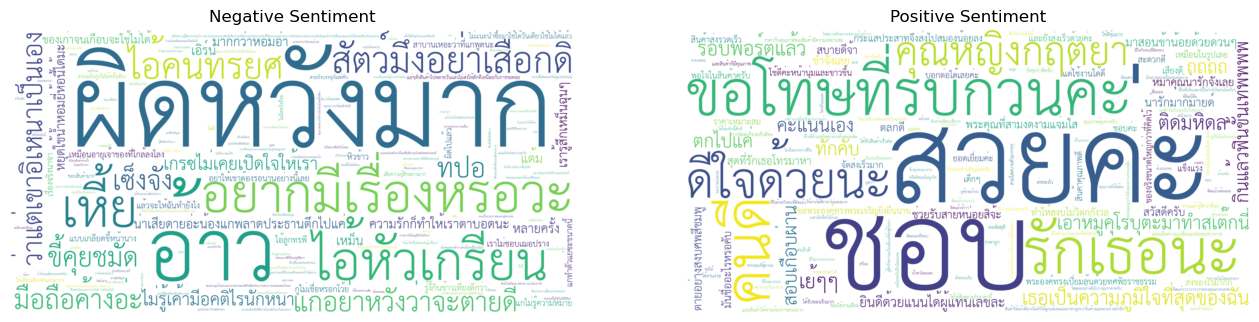

In [63]:
def word_cloud(lst):
    text_neg = " ".join(text for text, sentiment in lst if sentiment == 'negative')
    text_pos = " ".join(text for text, sentiment in lst if sentiment == 'positive')

    fp = 'THSarabunNew.ttf'
    reg = r"[‡∏Å-‡πôa-zA-Z']+"

    wordcloud_neg = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000,
                            height=2000, width=4000, font_path=fp, regexp=reg).generate(text_neg)

    wordcloud_pos = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000,
                            height=2000, width=4000, font_path=fp, regexp=reg).generate(text_pos)

    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    axs[0].imshow(wordcloud_neg, interpolation='bilinear')
    axs[0].axis('off')
    axs[0].set_title(f'Negative Sentiment')

    axs[1].imshow(wordcloud_pos, interpolation='bilinear')
    axs[1].axis('off')
    axs[1].set_title(f'Positive Sentiment')

    plt.show()

word_cloud(sentiment_ml1)
word_cloud(sentiment_ml2)

## Confidence

In [64]:
def confidence(lst, method="boxplot"):
    df = pd.DataFrame(lst, columns=['Sentiment', 'Confidence'])
    plt.figure(figsize=(10, 8))
    
    if method == "boxplot":
        sns.boxplot(x='Sentiment', y='Confidence', data=df)
        
    elif method == "heatmap":
        bins = np.linspace(50, 100, 10)
        df['Confidence_Range'] = pd.cut(df['Confidence'], bins=bins, include_lowest=True)
        pivot_df = df.pivot_table(values='Confidence', index='Confidence_Range', 
                                  columns='Sentiment', aggfunc='count', fill_value=0)
        pivot_df = pivot_df.sort_index(ascending=False)
        sns.heatmap(pivot_df, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Count'})
    
    plt.xlabel("Sentiment")
    plt.ylabel("Confidence")
    plt.title("Sentiment Analysis Confidence Levels")
    plt.tight_layout()
    plt.show()

confidence(confidence_lst, "boxplot")
confidence(confidence_lst, "heatmap")

# Test 2

In [ ]:
from pythainlp import word_tokenize
from tqdm import tqdm_notebook
from pythainlp.ulmfit import process_tha

In [ ]:
from thai_sentiment import get_sentiment

get_sentiment("‡∏Ñ‡∏ß‡∏¢‡πÑ‡∏£‡πÑ‡∏≠‡∏™‡∏±‡∏™")